<a href="https://colab.research.google.com/github/Virtud87/2024-NFL-Big-Data-Bowl/blob/main/2024_NFL_Big_Data_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In the dynamic world of American football, where every play counts and player performance is meticulously analyzed, I introduce the novel metric, the Tackle Impact Rating (TIR), as a crucial tool for helping assess defensive players' effectiveness. The TIR metric provides a comprehensive insight into a defender's ability to make impactful tackles on the field. It goes beyond merely quantifying the number of tackles executed by a player, delving into the quality and influence of those tackles within the game.

At its core, the Tackle Impact Rating (TIR) serves as a sophisticated measure that evaluates the significance and effectiveness of a defensive player's tackles during gameplay. While traditional statistics may capture the volume of tackles made by a player, TIR strives to encapsulate the qualitative aspects, shedding light on the impact each tackle contributes to the team's defensive strategy.

TIR is not a singular, straightforward statistic but rather a composite metric derived from various contributing factors. It considers multiple facets of a tackle, such as the tackled player's position on the field, the yardage gained or lost after the tackle, and whether the tackle led to a change in possession or even a safety or a touchdown. By combining these elements, TIR aims to assign a numerical value that represents the significance and effectiveness of each defensive player's tackles.

The metric's methodology typically involves a combination of data points from engineered features extracted from game records, player tracking, and situational analysis. Advanced analytics play a pivotal role in processing vast amounts of intricate game data to derive meaningful insights into player performance.

One of the core objectives of TIR is to offer a more nuanced and holistic evaluation of defensive prowess beyond the traditional tackle count. For instance, a player making fewer tackles but consistently executing impactful tackles resulting in significant yardage loss or a turnover for the opposing team might receive a higher TIR than a player with a higher volume of tackles but less impact on the game's dynamics.

The practical application of the TIR metric extends beyond individual player assessments. Teams and coaching staff leverage this metric to make informed decisions, such as player selection, defensive strategy refinement, and performance optimization. After all, TIR for each defensive player can be combined to get an idea of how the defense as a whole is performing relative to tackling performance. Additionally, it aids in identifying key players who excel in making influential tackles and understanding their contributions to the team's overall defensive effectiveness.

However, it's essential to acknowledge that while TIR provides a comprehensive assessment of tackling effectiveness, it might not encapsulate every aspect of a defender's performance. Other defensive contributions, such as pass coverage, interceptions, or quarterback pressures, also significantly influence a player's overall defensive value.

## **Scoring**


Only plays that were not nullified by a penalty and involved a tackle, assisted tackle, or unsuccessful attempted tackle, and had the following play outcomes were scored: tackle, fumble, sack, defense recovers fumble, offense recovers fumble, safety, or touchdown.


A successful tackle earns a defender 2 points while an assist earns 1 point and an unsuccessful tackle attempt earns no points.

If a tackle or assist results in a fumble, 1 point is earned while another point is earned if the defense recovers the fumble.

If a tackle or assist was completed in the Red Zone, 1 point is earned.

If a tackle or assist was completed during the two-minute warning of the second quarter, 1 point is earned while 2 points are earned during a tackle or assist completed during the two-minute warning of the fourth quarter.

If a tackle or assist was completed in the offense's territory, 1 point is earned while 2 points are earned if completed within the first ten yards of the offense's territory, or the Yellow Zone.

If no yards were gained from a tackle or assist, 1 point is earned and 2 points through 14 are earned for every 5 yards lost up to 65 yards, respectively.

If a tackle or assist is completed during third down, 1 point is earned while 2 points are earned if it was completed during fourth down.

If the tackle or assist resulted in a quaterback sack, 1 point is earned.

If the tackle or assist resulted in a safety, 3 points are earned.

If the tackle or assist resulted in the defense scoring a touchdown, 5 points are earned.

A defender's points are added up for each play in which they completed a tackle or an assisted tackle. All the defender's scored plays are then added up and then divided by the total number of attempted tackles, regardless or whether they were successful or not, to determine that player's TIR for the game. Taking the average allows for standardizing the scores and comparing them between a defender's different games and between other defenders.



# **Appendix**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **Plays**

In [ ]:
# Load plays.csv and set it as a data frame
plays_df = pd.read_csv('/content/plays.csv')

# Check first five rows
plays_df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [ ]:
# Check all the columns
plays_df.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'],
      dtype='object')

In [ ]:
# Dropping irrelevant columns
plays_df.drop(['ballCarrierId', 'playDescription', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'], axis = 1, inplace=True)

# Dropping rows where the play was nullified by penalty
plays_df = plays_df[plays_df['playNullifiedByPenalty'] != 'Y']

# Dropping column for play nullified by penalty as it is no longer relevant
plays_df = plays_df.drop('playNullifiedByPenalty', axis=1)

# Convert game clock value to integer
plays_df['gameClock'] = plays_df['gameClock'].str.replace(':', '').astype(int)

# **Tackles**

In [ ]:
# Load tackles.csv data set it as a data frame
tackles_df = pd.read_csv('/content/tackles.csv')

# Check first five rows
tackles_df.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [ ]:
# Check data types for each column
tackles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


- All columns are of type 'int'. No missing values.

# **Players**

In [ ]:
# Load players.csv and set it as a data frame
players_df = pd.read_csv('/content/players.csv')

# Check the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [ ]:
# Dropping irrelevant columns
players_df.drop(['height', 'weight', 'birthDate', 'collegeName'], axis = 1, inplace=True)

In [ ]:
# Check column types and missing values
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   position     1683 non-null   object
 2   displayName  1683 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.6+ KB


- No missing values

In [ ]:
# Inner join player and tackles tables on NFL ID
tackles_df = tackles_df.merge(players_df, on='nflId', how='inner')

# Rename column to a more-specific name
tackles_df = tackles_df.rename(columns={'position': 'defenderPosition'})

# Inner join data frames on game ID and play ID
plays_tackles_df = tackles_df.merge(plays_df, on=['gameId', 'playId'], how='inner')

# Adjusting the distance to the end zone for the offense. It may be that the original distance is for back of end zone.
plays_tackles_df['absoluteYardlineNumber'] = plays_tackles_df['absoluteYardlineNumber'] - 10

# Changing some column names to better describe the data
plays_tackles_df = plays_tackles_df.rename(columns={'displayName': 'defender', 'ballCarrierDisplayName': 'ballCarrier', 'possessionTeam': 'offense', 'defensiveTeam': 'defense', 'yardlineSide': 'territory', 'yardlineNumber': 'yardLOS', 'playResult': 'yardsGained/Lost', 'absoluteYardlineNumber': 'oDistanceToEndZone'})

# Setting the offense's distance to the end zone to the value of the Line of Scrimage when the offense is not in their own territory
plays_tackles_df.loc[plays_tackles_df['offense'] != plays_tackles_df['territory'], 'oDistanceToEndZone'] = plays_tackles_df['yardLOS']

# Setting the offense's distance to the end zone to the value of 100 minus the listed
plays_tackles_df.loc[plays_tackles_df['offense'] == plays_tackles_df['territory'], 'oDistanceToEndZone'] = 100 - plays_tackles_df['yardLOS']

# Check the first five rows
plays_tackles_df.head()


,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,defenderPosition,defender,ballCarrier,quarter,down,yardsToGo,offense,defense,territory,yardLOS,gameClock,yardsGained/Lost,oDistanceToEndZone
0,2022090800,101,42816,1,0,0,0,CB,Troy Hill,Devin Singletary,1,1,10,BUF,LA,BUF,38,1354,7,62
1,2022090800,1102,42816,1,0,0,0,CB,Troy Hill,Zack Moss,2,2,6,BUF,LA,LA,25,937,2,25
2,2022090800,1102,52492,0,0,0,1,OLB,Terrell Lewis,Zack Moss,2,2,6,BUF,LA,LA,25,937,2,25
3,2022090800,2043,42816,1,0,0,0,CB,Troy Hill,Devin Singletary,3,1,10,BUF,LA,BUF,42,1302,12,58
4,2022090800,2527,42816,1,0,0,0,CB,Troy Hill,Jamison Crowder,3,2,10,BUF,LA,BUF,22,306,11,78


# **Tracking Week 1**

In [ ]:
# Load tracking_week_1.csv and set it to a data frame
tracking_week_1_df = pd.read_csv('/content/tracking_week_1.csv')

# Check first five rows
tracking_week_1_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [ ]:
# Check last five rows
tracking_week_1_df.tail()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN,tackle
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN,NaN
1407438,2022091200,3826,NaN,football,53,2022-09-12 23:05:58.200000,NaN,football,left,55.570000,10.57,1.86,3.00,0.20,NaN,NaN,NaN


In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_1_df = tracking_week_1_df.dropna(subset=['nflId'])

# Drop irrelevant and redundant columns
tracking_week_1_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

# Check for the event column's unique values
tracking_week_1_df['event'].unique()

array([nan, 'pass_arrived', 'pass_outcome_caught', 'tackle', 'run',
       'first_contact', 'ball_snap', 'handoff', 'touchdown',
       'out_of_bounds', 'man_in_motion', 'fumble', 'play_action',
       'pass_forward', 'lateral', 'line_set', 'qb_slide', 'shift',
       'run_pass_option', 'qb_sack', 'pass_shovel', 'snap_direct',
       'fumble_defense_recovered', 'fumble_offense_recovered',
       'autoevent_ballsnap'], dtype=object)

In [ ]:
# Filtering for plays whose event is a tackle, sack, or a fumble recovery by the offense or defense
tracking_week_1_df = tracking_week_1_df[(tracking_week_1_df['event'] == 'tackle') |
 (tracking_week_1_df['event'] == 'touchdown') | (tracking_week_1_df['event'] == 'fumble') |
  (tracking_week_1_df['event'] == 'qb_sack') | (tracking_week_1_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_1_df['event'] == 'fumble_offense_recovered')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_1_df = plays_tackles_df.merge(tracking_week_1_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_1_df = plays_tackles_tracking_1_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_1_df = plays_tackles_tracking_1_df.drop_duplicates(subset=['gameId', 'playId'])

# Load games dataset and convert to data frame
games_df = pd.read_csv('/content/games.csv')

# Keep only columns for game ID and game date
games_df = games_df[['gameId', 'gameDate']]

# Inner join between plays_tackles_tracking_1_df and games_df on game ID and game date
plays_tackles_tracking_1_df = plays_tackles_tracking_1_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 2**

In [ ]:
# Load tracking_week_2.csv and set it to a data frame
tracking_week_2_df = pd.read_csv('/content/tracking_week_2.csv')

In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_2_df = tracking_week_2_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_2_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

# Check for the event column's unique values
tracking_week_2_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'out_of_bounds', 'shift',
       'play_action', 'lateral', 'run', 'touchdown', 'man_in_motion',
       'pass_forward', 'qb_slide', 'fumble', 'penalty_flag',
       'snap_direct', 'line_set', 'fumble_defense_recovered', 'qb_sack',
       'pass_shovel', 'safety'], dtype=object)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_2_df = tracking_week_2_df[(tracking_week_2_df['event'] == 'tackle') |
 (tracking_week_2_df['event'] == 'touchdown') | (tracking_week_2_df['event'] == 'fumble') |
  (tracking_week_2_df['event'] == 'qb_sack') | (tracking_week_2_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_2_df['event'] == 'fumble_offense_recovered') | (tracking_week_2_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_2_df = plays_tackles_df.merge(tracking_week_2_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_2_df = plays_tackles_tracking_2_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_2_df = plays_tackles_tracking_2_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_2_df and games_df on game ID and game date
plays_tackles_tracking_2_df = plays_tackles_tracking_2_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 3**

In [ ]:
# Load tracking_week_3.csv and set it to a data frame
tracking_week_3_df = pd.read_csv('/content/tracking_week_3.csv')

In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_3_df = tracking_week_3_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_3_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

# Check for the event column's unique values
tracking_week_3_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'shift', 'run', 'touchdown',
       'out_of_bounds', 'fumble', 'play_action', 'man_in_motion',
       'lateral', 'pass_shovel', 'qb_slide', 'pass_forward',
       'pass_outcome_touchdown', 'line_set', 'safety', 'snap_direct'],
      dtype=object)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_3_df = tracking_week_3_df[(tracking_week_3_df['event'] == 'tackle') |
 (tracking_week_3_df['event'] == 'touchdown') | (tracking_week_3_df['event'] == 'fumble') |
  (tracking_week_3_df['event'] == 'qb_sack') | (tracking_week_3_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_3_df['event'] == 'fumble_offense_recovered') | (tracking_week_3_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_3_df = plays_tackles_df.merge(tracking_week_3_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_3_df = plays_tackles_tracking_3_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_3_df = plays_tackles_tracking_3_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_3_df and games_df on game ID and game date
plays_tackles_tracking_3_df = plays_tackles_tracking_3_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 4**

In [ ]:
# Load tracking_week_4.csv and set it to a data frame
tracking_week_4_df = pd.read_csv('/content/tracking_week_4.csv')

In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_4_df = tracking_week_4_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_4_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

# Check for the event column's unique values
tracking_week_4_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'touchdown',
       'man_in_motion', 'out_of_bounds', 'pass_forward', 'lateral', 'run',
       'shift', 'play_action', 'qb_sack', 'fumble', 'line_set',
       'qb_slide', 'snap_direct', 'pass_shovel'], dtype=object)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_4_df = tracking_week_4_df[(tracking_week_4_df['event'] == 'tackle') |
 (tracking_week_4_df['event'] == 'touchdown') | (tracking_week_4_df['event'] == 'fumble') |
  (tracking_week_4_df['event'] == 'qb_sack') | (tracking_week_4_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_4_df['event'] == 'fumble_offense_recovered') | (tracking_week_4_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_4_df = plays_tackles_df.merge(tracking_week_4_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_4_df = plays_tackles_tracking_4_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_4_df = plays_tackles_tracking_4_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_4_df and games_df on game ID and game date
plays_tackles_tracking_4_df = plays_tackles_tracking_4_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 5**

In [ ]:
# Load tracking_week_5.csv and set it to a data frame
tracking_week_5_df = pd.read_csv('/content/tracking_week_5.csv')

In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_5_df = tracking_week_5_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_5_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

# Check for the event column's unique values
tracking_week_5_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'out_of_bounds', 'run',
       'fumble', 'man_in_motion', 'shift', 'play_action', 'touchdown',
       'pass_forward', 'snap_direct', 'line_set', 'qb_slide',
       'pass_shovel', 'lateral', 'penalty_flag'], dtype=object)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_5_df = tracking_week_5_df[(tracking_week_5_df['event'] == 'tackle') |
 (tracking_week_5_df['event'] == 'touchdown') | (tracking_week_5_df['event'] == 'fumble') |
  (tracking_week_5_df['event'] == 'qb_sack') | (tracking_week_5_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_5_df['event'] == 'fumble_offense_recovered') | (tracking_week_5_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_5_df = plays_tackles_df.merge(tracking_week_5_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_5_df = plays_tackles_tracking_5_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_5_df = plays_tackles_tracking_5_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_4_df and games_df on game ID and game date
plays_tackles_tracking_5_df = plays_tackles_tracking_5_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 6**

In [ ]:
# Load tracking_week_6.csv and set it to a data frame
tracking_week_6_df = pd.read_csv('/content/tracking_week_6.csv')

In [ ]:
# Drop rows where NFL ID corresponds to ball
tracking_week_6_df = tracking_week_6_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_6_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_6_df = tracking_week_6_df[(tracking_week_6_df['event'] == 'tackle') |
 (tracking_week_6_df['event'] == 'touchdown') | (tracking_week_6_df['event'] == 'fumble') |
  (tracking_week_6_df['event'] == 'qb_sack') | (tracking_week_6_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_6_df['event'] == 'fumble_offense_recovered') | (tracking_week_6_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_6_df = plays_tackles_df.merge(tracking_week_6_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_6_df = plays_tackles_tracking_6_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_6_df = plays_tackles_tracking_6_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_4_df and games_df on game ID and game date
plays_tackles_tracking_6_df = plays_tackles_tracking_6_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 7**

In [ ]:
# Load tracking_week_7.csv and set it to a data frame
tracking_week_7_df = pd.read_csv('/content/tracking_week_7.csv')

# Drop rows where NFL ID corresponds to ball
tracking_week_7_df = tracking_week_7_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_7_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_7_df = tracking_week_7_df[(tracking_week_7_df['event'] == 'tackle') |
 (tracking_week_7_df['event'] == 'touchdown') | (tracking_week_7_df['event'] == 'fumble') |
  (tracking_week_7_df['event'] == 'qb_sack') | (tracking_week_7_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_7_df['event'] == 'fumble_offense_recovered') | (tracking_week_7_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_7_df = plays_tackles_df.merge(tracking_week_7_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_7_df = plays_tackles_tracking_7_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_7_df = plays_tackles_tracking_7_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_7_df and games_df on game ID and game date
plays_tackles_tracking_7_df = plays_tackles_tracking_7_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 8**

In [ ]:
# Load tracking_week_8.csv and set it to a data frame
tracking_week_8_df = pd.read_csv('/content/tracking_week_8.csv')

# Drop rows where NFL ID corresponds to ball
tracking_week_8_df = tracking_week_8_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_8_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_8_df = tracking_week_8_df[(tracking_week_8_df['event'] == 'tackle') |
 (tracking_week_8_df['event'] == 'touchdown') | (tracking_week_8_df['event'] == 'fumble') |
  (tracking_week_8_df['event'] == 'qb_sack') | (tracking_week_8_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_8_df['event'] == 'fumble_offense_recovered') | (tracking_week_8_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_8_df = plays_tackles_df.merge(tracking_week_8_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_8_df = plays_tackles_tracking_8_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_8_df = plays_tackles_tracking_8_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_8_df and games_df on game ID and game date
plays_tackles_tracking_8_df = plays_tackles_tracking_8_df.merge(games_df, on='gameId', how='inner')

# **Tracking Week 9**

In [ ]:
# Load tracking_week_9.csv and set it to a data frame
tracking_week_9_df = pd.read_csv('/content/tracking_week_9.csv')

# Drop rows where NFL ID corresponds to ball
tracking_week_9_df = tracking_week_9_df.dropna(subset=['nflId'])

# Drop irrelevant or redundant columns
tracking_week_9_df.drop(['nflId', 'displayName', 'time', 'frameId', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir'], axis=1, inplace=True)

In [ ]:
# Filtering for plays whose event is a tackle, touchdown, sack, or a fumble recovery by the offense or defense
tracking_week_9_df = tracking_week_9_df[(tracking_week_9_df['event'] == 'tackle') |
 (tracking_week_9_df['event'] == 'touchdown') | (tracking_week_9_df['event'] == 'fumble') |
  (tracking_week_9_df['event'] == 'qb_sack') | (tracking_week_9_df['event'] == 'fumble_defense_recovered') |
   (tracking_week_9_df['event'] == 'fumble_offense_recovered') | (tracking_week_9_df['event'] == 'safety')]

# Inner Join the tables on Game ID and Play ID
plays_tackles_tracking_9_df = plays_tackles_df.merge(tracking_week_9_df, on=['gameId', 'playId'], how='inner')

# Dropping NFL ID as it IDs the defender, which is already identified by name
plays_tackles_tracking_9_df = plays_tackles_tracking_9_df.drop('nflId', axis=1)

# Keep only the first occurrence of each unique combination of 'gameId' and 'playId'
plays_tackles_tracking_9_df = plays_tackles_tracking_9_df.drop_duplicates(subset=['gameId', 'playId'])

# Inner join between plays_tackles_tracking_9_df and games_df on game ID and game date
plays_tackles_tracking_9_df = plays_tackles_tracking_9_df.merge(games_df, on='gameId', how='inner')

# **All Nine Weeks Combined**

In [ ]:
# Combining all nine tracking weeks into one data frame
first_nine_weeks_df = pd.concat([plays_tackles_tracking_1_df, plays_tackles_tracking_2_df, plays_tackles_tracking_3_df, plays_tackles_tracking_4_df, plays_tackles_tracking_5_df, plays_tackles_tracking_6_df, plays_tackles_tracking_7_df, plays_tackles_tracking_8_df, plays_tackles_tracking_9_df], ignore_index=True)

In [ ]:
# Check first five rows
first_nine_weeks_df.head()

,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle,defenderPosition,defender,ballCarrier,quarter,...,yardsToGo,offense,defense,territory,yardLOS,gameClock,yardsGained/Lost,oDistanceToEndZone,event,gameDate
0,2022090800,101,1,0,0,0,CB,Troy Hill,Devin Singletary,1,...,10,BUF,LA,BUF,38,1354,7,62,tackle,09/08/2022
1,2022090800,1102,1,0,0,0,CB,Troy Hill,Zack Moss,2,...,6,BUF,LA,LA,25,937,2,25,tackle,09/08/2022
2,2022090800,2043,1,0,0,0,CB,Troy Hill,Devin Singletary,3,...,10,BUF,LA,BUF,42,1302,12,58,tackle,09/08/2022
3,2022090800,2527,1,0,0,0,CB,Troy Hill,Jamison Crowder,3,...,10,BUF,LA,BUF,22,306,11,78,tackle,09/08/2022
4,2022090800,529,1,0,0,0,CB,Troy Hill,Devin Singletary,1,...,10,BUF,LA,BUF,9,506,7,91,tackle,09/08/2022


In [ ]:
# Check the columns data types
first_nine_weeks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gameId              9983 non-null   int64 
 1   playId              9983 non-null   int64 
 2   tackle              9983 non-null   int64 
 3   assist              9983 non-null   int64 
 4   forcedFumble        9983 non-null   int64 
 5   pff_missedTackle    9983 non-null   int64 
 6   defenderPosition    9983 non-null   object
 7   defender            9983 non-null   object
 8   ballCarrier         9983 non-null   object
 9   quarter             9983 non-null   int64 
 10  down                9983 non-null   int64 
 11  yardsToGo           9983 non-null   int64 
 12  offense             9983 non-null   object
 13  defense             9983 non-null   object
 14  territory           9844 non-null   object
 15  yardLOS             9983 non-null   int64 
 16  gameClock           9983

In [ ]:
# Changing 'gameDate' column from type 'object' to type 'dateTime'
first_nine_weeks_df.gameDate = pd.to_datetime(first_nine_weeks_df.gameDate, infer_datetime_format = True).dt.date

- The 139 missing values under 'territory' are neutral as the LOS is on the 50-yard line

In [ ]:
# Check the amount of rows and columns
first_nine_weeks_df.shape

(9983, 21)

- The final data frame has 9,983 rows and 21 columns.

In [ ]:
# Data frame numerical summary
first_nine_weeks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,9983.0,2.022099e+09,5956.202443,2.022091e+09,2.022093e+09,2.022101e+09,2.022102e+09,2.022111e+09
playId,9983.0,1.993912e+03,1179.389716,5.400000e+01,9.535000e+02,2.013000e+03,3.002500e+03,5.096000e+03
tackle,9983.0,6.863668e-01,0.463992,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
assist,9983.0,2.469198e-01,0.431241,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
forcedFumble,9983.0,8.314134e-03,0.090807,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pff_missedTackle,9983.0,7.021937e-02,0.255529,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
quarter,9983.0,2.561855e+00,1.140217,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
down,9983.0,1.713112e+00,0.786479,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
yardsToGo,9983.0,8.520284e+00,3.922813,1.000000e+00,6.000000e+00,1.000000e+01,1.000000e+01,3.600000e+01
yardLOS,9983.0,2.976610e+01,12.233891,1.000000e+00,2.200000e+01,3.000000e+01,4.000000e+01,5.000000e+01


- The most yards lost were 61 and the most yards gained were 81

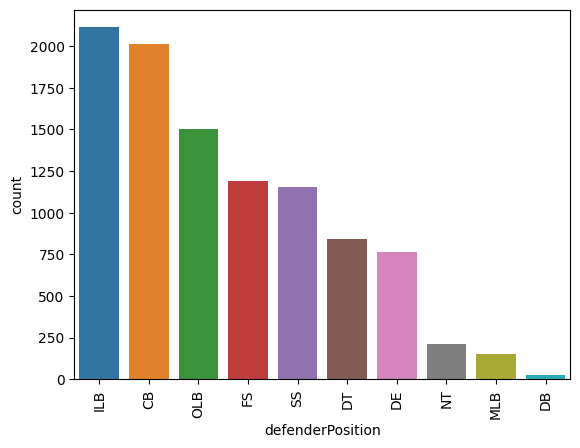

In [ ]:
# Check univariate analysis of brand name
def bar_chart(feature, figsize = (15, 10)):
  sns.countplot(data=feature, x=feature, order = feature.value_counts().index);
  plt.xticks(rotation=90)
  plt.show()

bar_chart(first_nine_weeks_df.defenderPosition)

- Inside Line Backers, Corner Backs, and Outside Line Backers have the most attempted tackles

- Nose Tackles, Middle Line Backers, and Defensive Backs have the least amount of attempted tackles

# **Feature Engineering**

In [ ]:
# Add column 'redZone' and set it to 1 if true, 0 if false
first_nine_weeks_df['redZone'] = ((first_nine_weeks_df['defense'] == first_nine_weeks_df['territory']) & (first_nine_weeks_df['yardLOS'] <= 20)).astype(int)

In [ ]:
# Add column 'twoMinWarningFirstHalf' where it's second quarter and 2 minutes or less to play and set it to 1 if true, 0 if false
first_nine_weeks_df['twoMinWarningFirstHalf'] = ((first_nine_weeks_df['gameClock'] <= 200) & (first_nine_weeks_df['quarter'].isin([2]))).astype(int)


In [ ]:
# Add column 'twoMinWarningSecondHalf' where it's fourth quarter and 2 minutes or less to play and set it to 1 if true, 0 if false
first_nine_weeks_df['twoMinWarningSecondHalf'] = ((first_nine_weeks_df['gameClock'] <= 200) & (first_nine_weeks_df['quarter'].isin([4]))).astype(int)

In [ ]:
# Add column 'offensesTerritory' where a tackle was made inside the offense's territory and set it to 1 if true, 0 if false
first_nine_weeks_df['offensesTerritory'] = (((first_nine_weeks_df['offense'] == first_nine_weeks_df['territory']) &
                                                     (first_nine_weeks_df['yardLOS'] + first_nine_weeks_df['yardsGained/Lost'] < 50)) |
                                                    ((first_nine_weeks_df['yardLOS'] == 50) &
                                                     (first_nine_weeks_df['yardsGained/Lost'] < 0))).astype(int)

In [ ]:
# Add column 'yellowZone' where it's the offense's territory and within the first 10 yards and set it to 1 if true, 0 if false
first_nine_weeks_df['yellowZone'] = ((first_nine_weeks_df['offense'] == first_nine_weeks_df['territory']) &
                                                    (first_nine_weeks_df['yardLOS'] <= 10) &
                                                    ((first_nine_weeks_df['yardLOS'] + first_nine_weeks_df['yardsGained/Lost']) < 10)).astype(int)

In [ ]:
# Add column 'noYardsGained' and set it to 1 if true, 0 if false
first_nine_weeks_df['noYardsGained'] = (first_nine_weeks_df['yardsGained/Lost'] == 0).astype(int)

In [ ]:
# Add column 'upToFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -6) & (first_nine_weeks_df['yardsGained/Lost'] < 0)).astype(int)


In [ ]:
# Add column 'upToTenYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToTenYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -11) & (first_nine_weeks_df['yardsGained/Lost'] < -5)).astype(int)

In [ ]:
# Add column 'upToFifteenYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFifteenYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -16) & (first_nine_weeks_df['yardsGained/Lost'] < -10)).astype(int)

In [ ]:
# Add column 'upToTwentyYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToTwentyYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -21) & (first_nine_weeks_df['yardsGained/Lost'] < -15)).astype(int)

In [ ]:
# Add column 'upToTwentyFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToTwentyFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -26) & (first_nine_weeks_df['yardsGained/Lost'] < -20)).astype(int)

In [ ]:
# Add column 'upToThirtyYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToThirtyYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -31) & (first_nine_weeks_df['yardsGained/Lost'] < -25)).astype(int)

In [ ]:
# Add column 'upToThirtyFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToThirtyFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -36) & (first_nine_weeks_df['yardsGained/Lost'] < -30)).astype(int)

In [ ]:
# Add column 'upToFourtyYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFourtyYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -41) & (first_nine_weeks_df['yardsGained/Lost'] < -35)).astype(int)

In [ ]:
# Add column 'upToFourtyFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFourtyFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -46) & (first_nine_weeks_df['yardsGained/Lost'] < -40)).astype(int)

In [ ]:
# Add column 'upToFiftyYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFiftyYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -51) & (first_nine_weeks_df['yardsGained/Lost'] < -45)).astype(int)

In [ ]:
# Add column 'upToFiftyFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToFiftyFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -56) & (first_nine_weeks_df['yardsGained/Lost'] < -50)).astype(int)

In [ ]:
# Add column 'upToSixtyYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToSixtyYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -61) & (first_nine_weeks_df['yardsGained/Lost'] < -55)).astype(int)

In [ ]:
# Add column 'upToSixtyFiveYardLoss' and set it to 1 if true, 0 if false
first_nine_weeks_df['upToSixtyFiveYardLoss'] = ((first_nine_weeks_df['yardsGained/Lost'] > -66) & (first_nine_weeks_df['yardsGained/Lost'] < -60)).astype(int)

In [ ]:
# Add column 'fourthDown' and set it to 1 if true, 0 if false
first_nine_weeks_df['fourthDown'] = (first_nine_weeks_df['down'] == 4).astype(int)

In [ ]:
# Add column 'thirdDown' and set it to 1 if true, 0 if false
first_nine_weeks_df['thirdDown'] = (first_nine_weeks_df['down'] == 3).astype(int)

In [ ]:
# Add column 'fumbleDefenseRecovered' and set it to 1 if true, 0 if false
first_nine_weeks_df['fumbleDefenseRecovered'] = (first_nine_weeks_df['event'] == 'fumble_defense_recovered').astype(int)

In [ ]:
# Add column 'sack' and set it to 1 if true, 0 if false
first_nine_weeks_df['sack'] = (first_nine_weeks_df['event'] == 'qb_sack').astype(int)

In [ ]:
# Add column 'safety' and set it to 1 if true, 0 if false
first_nine_weeks_df['safety'] = (first_nine_weeks_df['event'] == 'safety').astype(int)

In [ ]:
# Add column 'touchdown' and set it to 1 if true, 0 if false
first_nine_weeks_df['touchdown'] = (first_nine_weeks_df['event'] == 'touchdown').astype(int)

In [ ]:
# Drop columns used to engineer new features
first_nine_weeks_df = first_nine_weeks_df.drop(['ballCarrier', 'quarter', 'down', 'yardsToGo', 'offense', 'territory', 'yardLOS', 'gameClock', 'yardsGained/Lost', 'oDistanceToEndZone', 'event'], axis=1)

# **Assigning Additional Points**

In [ ]:
# Where a tackle occured, 2 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['tackle'] == 1, 'tackle'] = 2

# Where the defender missed a tackle, ensure features that could be true, independent of a tackle, are set to zero to avoid giving a false point to the defender
first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['redZone'] == 1), 'redZone'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['twoMinWarningFirstHalf'] == 1), 'twoMinWarningFirstHalf'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['twoMinWarningSecondHalf'] == 1), 'twoMinWarningSecondHalf'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['offensesTerritory'] == 1), 'offensesTerritory'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['yellowZone'] == 1), 'yellowZone'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['fourthDown'] == 1), 'fourthDown'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['thirdDown'] == 1), 'thirdDown'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['safety'] == 1), 'safety'] = 0

first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) & (first_nine_weeks_df['touchdown'] == 1), 'touchdown'] = 0

# Where a defender attempted a tackle but missed, no points will be assigned
first_nine_weeks_df.loc[(first_nine_weeks_df['pff_missedTackle'] == 1) , 'pff_missedTackle'] = 0

# Where a defender completed a tackle or assist in the Yellow Zone, 2 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['yellowZone'] == 1, 'yellowZone'] = 2

# Where up to 5 yards were lost, 2 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFiveYardLoss'] == 1, 'upToFiveYardLoss'] = 2

# Where up to 10 yards were lost, 3 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToTenYardLoss'] == 1, 'upToTenYardLoss'] = 3

# Where up to 15 yards were lost, 4 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFifteenYardLoss'] == 1, 'upToFifteenYardLoss'] = 4

# Where up to 20 yards were lost, 5 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToTwentyYardLoss'] == 1, 'upToTwentyYardLoss'] = 5

# Where up to 25 yards were lost, 6 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToTwentyFiveYardLoss'] == 1, 'upToTwentyFiveYardLoss'] = 6

# Where up to 30 yards were lost, 7 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToThirtyYardLoss'] == 1, 'upToThirtyYardLoss'] = 7

# Where up to 35 yards were lost, 8 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToThirtyFiveYardLoss'] == 1, 'upToThirtyFiveYardLoss'] = 8

# Where up to 40 yards were lost, 9 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFourtyYardLoss'] == 1, 'upToFourtyYardLoss'] = 9

# Where up to 45 yards were lost, 10 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFourtyFiveYardLoss'] == 1, 'upToFourtyFiveYardLoss'] = 10

# Where up to 50 yards were lost, 11 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFiftyYardLoss'] == 1, 'upToFiftyYardLoss'] = 11

# Where up to 55 yards were lost, 12 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToFiftyFiveYardLoss'] == 1, 'upToFiftyFiveYardLoss'] = 12

# Where up to 60 yards were lost, 13 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToSixtyYardLoss'] == 1, 'upToSixtyYardLoss'] = 13

# Where up to 65 yards were lost, 14 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['upToSixtyFiveYardLoss'] == 1, 'upToSixtyFiveYardLoss'] = 14

# Where a fourth down, 2 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['fourthDown'] == 1, 'fourthDown'] = 2

# Where a safety occured, 3 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['safety'] == 1, 'safety'] = 3

# Where a touchdown occured, 5 points will be assigned
first_nine_weeks_df.loc[first_nine_weeks_df['touchdown'] == 1, 'touchdown'] = 5


# **Examples of TIR Scores**

In [ ]:
# Get columns of type integer
numerical_columns = [column for column in first_nine_weeks_df.columns if first_nine_weeks_df[column].dtype == 'int64']
numerical_columns

['gameId',
 'playId',
 'tackle',
 'assist',
 'forcedFumble',
 'pff_missedTackle',
 'redZone',
 'twoMinWarningFirstHalf',
 'twoMinWarningSecondHalf',
 'offensesTerritory',
 'yellowZone',
 'noYardsGained',
 'upToFiveYardLoss',
 'upToTenYardLoss',
 'upToFifteenYardLoss',
 'upToTwentyYardLoss',
 'upToTwentyFiveYardLoss',
 'upToThirtyYardLoss',
 'upToThirtyFiveYardLoss',
 'upToFourtyYardLoss',
 'upToFourtyFiveYardLoss',
 'upToFiftyYardLoss',
 'upToFiftyFiveYardLoss',
 'upToSixtyYardLoss',
 'upToSixtyFiveYardLoss',
 'fourthDown',
 'thirdDown',
 'fumbleDefenseRecovered',
 'sack',
 'safety',
 'touchdown']

In [ ]:
# List of columns of type integer for summation
columns_to_sum = [
    'tackle',
 'assist',
 'forcedFumble',
 'pff_missedTackle',
 'redZone',
 'twoMinWarningFirstHalf',
 'twoMinWarningSecondHalf',
 'offensesTerritory',
 'yellowZone',
 'noYardsGained',
 'upToFiveYardLoss',
 'upToTenYardLoss',
 'upToFifteenYardLoss',
 'upToTwentyYardLoss',
 'upToTwentyFiveYardLoss',
 'upToThirtyYardLoss',
 'upToThirtyFiveYardLoss',
 'upToFourtyYardLoss',
 'upToFourtyFiveYardLoss',
 'upToFiftyYardLoss',
 'upToFiftyFiveYardLoss',
 'upToSixtyYardLoss',
 'upToSixtyFiveYardLoss',
 'fourthDown',
 'thirdDown',
 'fumbleDefenseRecovered',
 'sack',
 'safety',
 'touchdown'
]

# Adding up the values in each row for specified columns
first_nine_weeks_df['tackleImpact'] = first_nine_weeks_df[columns_to_sum].sum(axis=1)

## **Top Defenders**

In [ ]:
# Grouping by defender and calculating the sum and count for 'tackleImpact'
tackle_impact_summary = first_nine_weeks_df.groupby(['defender', 'defenderPosition', 'defense'])['tackleImpact'].agg(['sum', 'count'])

# Calculating Tackle Impact Rating by dividing the total sum by the count for each defender
tackle_impact_summary['Tackle Impact Rating'] = round(tackle_impact_summary['sum'] / tackle_impact_summary['count'], 2)

# Creating a new DataFrame to display each defender and their respective 'Tackle Impact Rating'
defender_ratings_df = pd.DataFrame(tackle_impact_summary['Tackle Impact Rating'])

# Resetting the index to get 'defender' as a column instead of an index
defender_ratings_df.reset_index(inplace=True)

# Renaming the columns for clarity
defender_ratings_df.columns = ['Defender', 'Position', 'Team', 'Tackle Impact Rating']

# Get the top ten defenders with the highest Tackle Impact Rating
top_defenders = defender_ratings_df.sort_values(by='Tackle Impact Rating', ascending=False).head(15)

# Displaying the resulting DataFrame
print(top_defenders.to_string(index=False))

           Defender Position Team  Tackle Impact Rating
        Jimmie Ward       FS   SF                  6.00
        Jake Martin       DE  NYJ                  6.00
   Michael Brockers       DE  DET                  5.00
       Jesse Luketa      OLB  ARI                  5.00
    Perrion Winfrey       DT  CLE                  5.00
   Christian Holmes       CB  WAS                  5.00
       Quinton Bell      OLB  ATL                  5.00
     Darryl Johnson      OLB  SEA                  5.00
          Tae Hayes       CB  CAR                  5.00
       Elijah Riley       CB  PIT                  5.00
         Dee Alford       CB  ATL                  4.78
        Shaka Toney       DE  WAS                  4.67
         P.J. Locke       FS  DEN                  4.50
Christian Covington       NT  LAC                  4.50
      Patrick Jones      OLB  MIN                  4.50


## **Top Teams**

In [ ]:
# Grouping by team and calculating the sum and count for 'tackleImpact'
team_ratings_summary = defender_ratings_df.groupby('Team')['Tackle Impact Rating'].agg(['sum', 'count'])

# Calculating Tackle Impact Rating by dividing the total sum by the count for each team
team_ratings_summary['Tackle Impact Rating'] = round(team_ratings_summary['sum'] / team_ratings_summary['count'], 2)

# Creating a new DataFrame to display each team and their respective Tackle Impact Rating
team_ratings = pd.DataFrame(team_ratings_summary['Tackle Impact Rating'])

# Resetting the index to get 'team' as a column instead of an index
team_ratings.reset_index(inplace=True)

# Get the top ten teams with the highest Tackle Impact Rating
top_teams = team_ratings.sort_values(by='Tackle Impact Rating', ascending=False).head(13)

# Displaying the resulting DataFrame
print(top_teams.to_string(index=False))

Team  Tackle Impact Rating
 WAS                  3.13
 SEA                  3.01
 ARI                  3.00
 MIN                  2.98
 NYJ                  2.97
 CLE                  2.97
 PHI                  2.97
  SF                  2.97
 PIT                  2.95
  KC                  2.91
 IND                  2.88
  NO                  2.87
 ATL                  2.86


## **Individual Player: Zaire Franklin**

- Single Game: 10-23-2022

In [ ]:
# Getting Zaire Franklin's tackling attempts for a single game
zaire_franklin_single_game_df = first_nine_weeks_df[
    (first_nine_weeks_df['defender'] == 'Zaire Franklin') &
    (first_nine_weeks_df['gameDate'] == pd.to_datetime('2022-10-23'))
]

# Extracting only 'playId' and 'tackleImpact' columns for Zaire Franklin's single game
zaire_franklin_single_game_df = zaire_franklin_single_game_df[['playId', 'tackleImpact']]

# Calculating Tackle Impact Rating (TIR) for Zaire Franklin in the single game
tir = round(zaire_franklin_single_game_df['tackleImpact'].sum() / zaire_franklin_single_game_df['tackleImpact'].count(), 2)

# Creating a DataFrame containing the Tackle Impact Rating as the final row
final_row = pd.DataFrame({'playId': 'Game TIR', 'tackleImpact': tir}, index=[len(zaire_franklin_single_game_df)])

# Concatenating the DataFrame with the final row to display Tackle Impact Rating as the last row
zaire_franklin_single_game_result = pd.concat([zaire_franklin_single_game_df, final_row])

# Renaming columns 'playId' to 'Play ID' and 'tackleImpact' to 'Tackle Impact'
zaire_franklin_single_game_result = zaire_franklin_single_game_result.rename(columns={'playId': 'Play ID', 'tackleImpact': 'Tackle Impact'})

# Display the result without showing indicies
print(zaire_franklin_single_game_result.to_string(index=False))


 Play ID  Tackle Impact
    2564            3.0
     380            4.0
     865            4.0
     172            5.0
    3135            2.0
    3529            1.0
     758            2.0
Game TIR            3.0


- Zaire Franklin's TIR for each nine games

In [ ]:
# Filter the DataFrame for Zaire Franklin's records
zaire_franklin_df = first_nine_weeks_df[first_nine_weeks_df['defender'] == 'Zaire Franklin']

# Group by 'gameId' and calculate the Tackle Impact Rating for Zaire Franklin for each unique game ID
tir_per_game = round(zaire_franklin_df.groupby('gameDate')['tackleImpact'].sum() / zaire_franklin_df.groupby('gameDate')['tackleImpact'].count(), 2)

# Convert 'tir_per_game' Series to a DataFrame
tir_per_game_df = pd.DataFrame({'Tackle_Impact_Rating': tir_per_game})

# Resetting the index to turn 'gameDate' into a column
tir_per_game_df.reset_index(inplace=True)

# Rename columns in the DataFrame 'tir_per_game_df'
tir_per_game_df = tir_per_game_df.rename(columns={'gameDate': 'Game Date', 'Tackle_Impact_Rating': 'Tackle Impact Rating'})

# Displaying the Tackle Impact Rating for Zaire Franklin for each unique game ID
print(tir_per_game_df.to_string(index=False))


 Game Date  Tackle Impact Rating
2022-09-11                  2.62
2022-09-18                  2.89
2022-09-25                  2.25
2022-10-02                  2.67
2022-10-06                  1.70
2022-10-16                  2.60
2022-10-23                  3.00
2022-10-30                  2.44
2022-11-06                  2.33


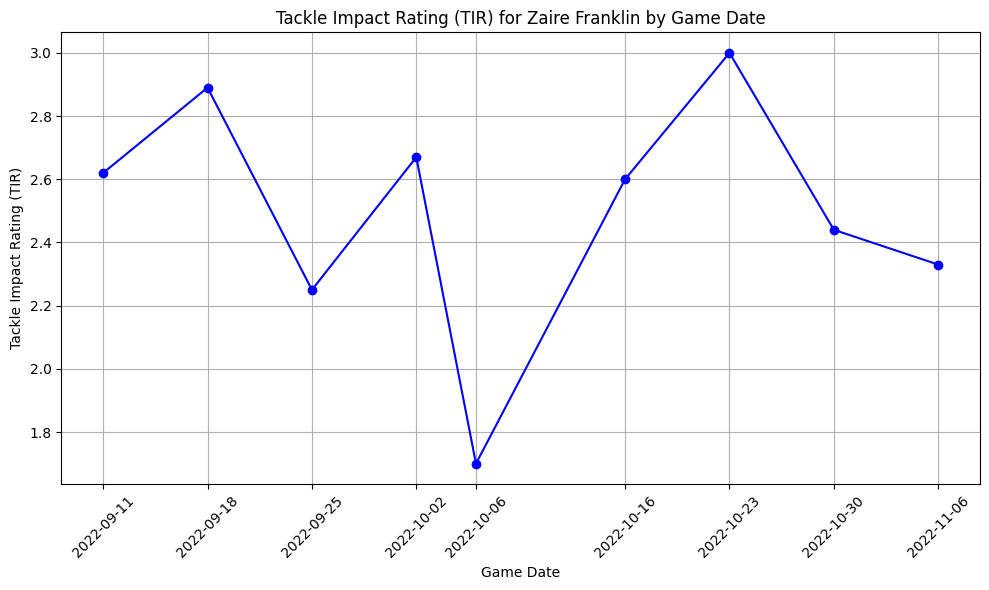

In [ ]:
# Plotting TIR against each game date for Zaire Franklin
plt.figure(figsize=(10, 6))
plt.plot(tir_per_game.index, tir_per_game.values, marker='o', linestyle='-', color='b')
plt.title('Tackle Impact Rating (TIR) for Zaire Franklin by Game Date')
plt.xlabel('Game Date')
plt.ylabel('Tackle Impact Rating (TIR)')
plt.xticks(tir_per_game.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()